### Imports

In [2]:
from definitions import *

### Process diplomas

In [14]:
dir_path_input = Path("../artifacts/parsing/spbu/processed_ext_doc/")
dir_path_output = Path("../artifacts/parsing/spbu/processed_ext_doc_only_russian_diplomas_stupid_filter/")
dir_path_output.mkdir(exist_ok=True, parents=True)

In [16]:
num_ok, num_all = 0, 0
for file in dir_path_input.glob("*.txt"):
    with open(file, "r") as f:
        text = f.read()
    if "выпускная квалификационная работа" in text.lower() and "отзыв" not in text.lower():
        with open(f"{dir_path_output}/{file.stem}.txt", "w") as f:
            f.write(text)
        print(text[:100])
        num_ok += 1
    num_all += 1
print(num_ok, num_all)

Санкт-Петербургский государственный университет



ЧЖАН Яо

Выпускная квалификационная работа

Интер
                 САНКТ-ПЕТЕРБУРГСКИЙ ГОСУДАРСТВЕННЫЙ УНИВЕРСИТЕТ


Кафедра культурной антропологии и
Санкт-Петербургский государственный университет


КОРНЮШЕНКО Ляйсан Ильдаровна

Выпускная квалификац
Санкт-Петербургский государственный университет


ХРОБОСТОВА Анастасия Александровна

Выпускная квал
Санкт-Петербургский государственный университет








АБДУЛЛАЕВ Шохжахон Улугбек угли

Выпускная к
Санкт-Петербургский государственный университет



КУДРИНА Александра Вячеславовна

Выпускная квалиф
Санкт-Петербургский государственный университет



Гуань Ай

Выпускная квалификационная работа

Язык
Санкт-Петербургский государственный университет



Жэнь Дунли

Выпускная квалификационная работа

Ср
ФГОУ ВО «Санкт-Петербургский государственный университет» 


Ольденборгер Полина Дмитриевна
ВЫПУСК
Санкт-Петербургский государственный университет




Лейкина Екатерина Алексеевна

Выпускная

### Make tokenizer work

In [3]:
from transformers import AutoTokenizer

model_to_repo = {
    "llama-2-7b": "meta-llama/Llama-2-7b",
    "llama-3-8b": "meta-llama/Meta-Llama-3-8B",
    "falcon": "tiiuae/falcon-7b",
    "bloom": "bigscience/bloom",
    "flan-t5-xxl": "google/flan-t5-xxl",
    "fred-t5-1.7b": "ai-forever/FRED-T5-1.7B",
    "phi": "microsoft/phi-2",
    "dolly-v2-7b": "databricks/dolly-v2-7b",
    "DeciLM-7b": "Deci/DeciLM-7B",
    "saiga_mistral_7b_lora": "IlyaGusev/saiga_mistral_7b_lora",
    "vicuna-7b": "lmsys/vicuna-7b-v1.5",
    "vikhr-7b": "Vikhrmodels/Vikhr-7b-0.1",
    "ru-longformer-large-4096": "kazzand/ru-longformer-large-4096",
    # with auth
    "mistral-7b": "mistralai/Mistral-7B-v0.1",
    "mixtral-8x7b": "mistralai/Mixtral-8x7B-v0.1",
    "gemma-7b": "google/gemma-7b",
}
dir_path_input = Path("../artifacts/parsing/spbu/processed_ext_doc_only_russian_diplomas_stupid_filter/")
dir_path_output = Path("../artifacts/tokens/diplomas_stupid_filter")
dir_path_output.mkdir(exist_ok=True, parents=True)

failed = []
for model, repo in tqdm(model_to_repo.items(), desc="Iterating through models"):
    try:
        tokenizer = AutoTokenizer.from_pretrained(repo)
        book_to_tokens = dict()
        for file in tqdm(dir_path_input.glob("*.txt"), desc="Iterating through directory"):
            with open(file, "r") as f:
                num_tokens = len(tokenizer(f.read())["input_ids"])
            book_to_tokens[file.stem] = num_tokens
        with open(f"{dir_path_output}/{model}.json", "w") as f:
            json.dump(book_to_tokens, f, indent=2, ensure_ascii=False)
    except Exception:
        failed.append(model)
print(f"failed: {failed}")

Iterating through models:   0%|          | 0/16 [00:00<?, ?it/s]

Iterating through models:  12%|█▎        | 2/16 [00:00<00:06,  2.15it/s]Token indices sequence length is longer than the specified maximum sequence length for this model (118000 > 2048). Running this sequence through the model will result in indexing errors
Iterating through directory: 23it [00:05,  4.10it/s]
Iterating through directory: 23it [00:02, 10.11it/s]06<00:38,  2.94s/it]
Iterating through models:  25%|██▌       | 4/16 [00:09<00:35,  2.94s/it]Token indices sequence length is longer than the specified maximum sequence length for this model (86841 > 512). Running this sequence through the model will result in indexing errors
Iterating through directory: 23it [00:02,  8.91it/s]
Iterating through models:  31%|███▏      | 5/16 [00:12<00:31,  2.89s/it]Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.

failed: ['llama-2-7b', 'llama-3-8b']


### Plot graphics

In [5]:
dir_path_output

PosixPath('../artifacts/tokens/diplomas_stupid_filter')

In [7]:
len(list(dir_path_output.glob("*")))

14

[ 8  7  4  1 10  6 11 12  9 13  2  0  3  5]
140708.30434782608 phi
129205.95652173914 falcon
96496.30434782608 flan-t5-xxl
70378.95652173914 dolly-v2-7b
64770.608695652176 bloom
57746.82608695652 DeciLM-7b
57746.82608695652 mixtral-8x7b
57746.82608695652 mistral-7b
57745.82608695652 saiga_mistral_7b_lora
53389.65217391304 vicuna-7b
43315.34782608696 vikhr-7b
40703.30434782609 gemma-7b
37008.608695652176 ru-longformer-large-4096
36097.86956521739 fred-t5-1.7b


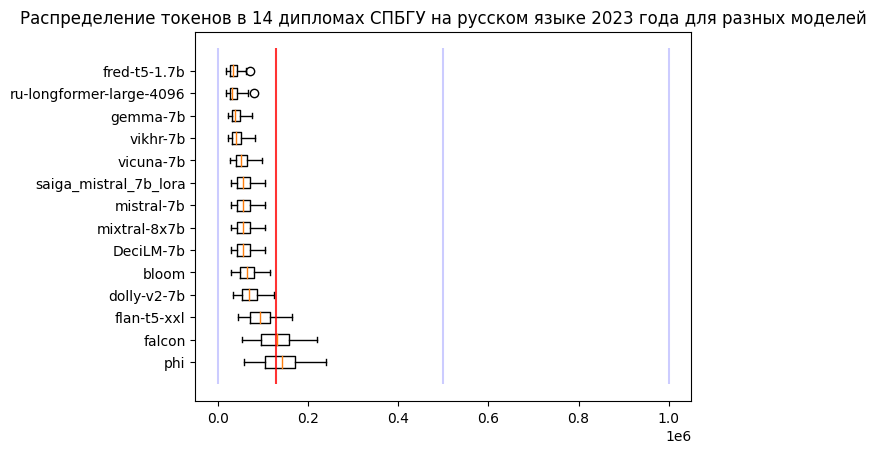

In [9]:
import matplotlib.pyplot as plt

values = []
labels = []
for file in Path(dir_path_output).glob("*"):
    labels.append(file.stem)
    with open(file, "r") as f:
        values.append(list(json.load(f).values()))
values = np.array(values)
labels = np.array(labels)
perm = range(len(values))
perm = sorted(perm, key=lambda i: -np.mean(values[i]))
perm = np.array(perm)
print(perm)
for p in perm:
    print(np.mean(values[p]), labels[p])
fig, ax = plt.subplots()
for position, column in enumerate(perm):
    ax.boxplot(values[column], positions=[position], vert=False, widths=0.5)
ax.set_yticks(range(position+1))
ax.set_yticklabels(labels[perm])
ax.vlines(np.array([0, 0.5, 1]) * 1e6, ymin=-1, ymax=len(labels), alpha=0.2, color='blue')
ax.vlines([128000], ymin=-1, ymax=len(labels), alpha=0.8, color='red')
plt.title("Распределение токенов в 14 дипломах СПБГУ на русском языке 2023 года для разных моделей")

plt.show()